In [1]:
!pip install alpha_vantage # installing the aplha_vantage package

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 15.6 MB/s eta 0:00:00


In [2]:
from alpha_vantage.timeseries import TimeSeries

In [3]:
import pandas as pd

api_key ="SQH68LM2H6H91AFW"
ts = TimeSeries(key=api_key, output_format='pandas',indexing_type='integer')


class ScriptData:
    def __init__(self):
        self.data = {}
        self.ts=None

    def fetch_intraday_data(self, script):
        data, _ = ts.get_intraday(symbol=script, interval='1min', outputsize='full') # Data fetching of intraday stock data using api_key
        return data

    def convert_intraday_data(self, script): # coverting fetched data into dataframe and save data dictionary to get the by using scipt_name as key
        data = self.fetch_intraday_data(script)
        data.columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume']
        df=data
        df['timestamp'] = pd.to_datetime(df['timestamp'])
        self.data[script]=df
        return df

    def __getitem__(self, key): # give the value while directly using object to show data
        return self.data[key]

    def __setitem__(self, key, value):
        self.data[key] = value

    def __contains__(self, key): # check whether a certain company stock data present or not
        return key in self.data


In [4]:
script = ScriptData()
script.convert_intraday_data('GOOGL')
script['GOOGL']

,timestamp,open,high,low,close,volume
index,,,,,,
0,2023-06-13 19:59:00,123.81,123.83,123.81,123.81,1384.0
1,2023-06-13 19:56:00,123.84,123.85,123.79,123.80,1509.0
2,2023-06-13 19:55:00,123.83,123.84,123.80,123.84,2085.0
3,2023-06-13 19:54:00,123.84,123.84,123.84,123.84,1087.0
4,2023-06-13 19:53:00,123.84,123.84,123.83,123.83,873.0
...,...,...,...,...,...,...
6239,2023-05-31 04:27:00,123.32,123.32,123.30,123.30,634.0
6240,2023-05-31 04:26:00,123.32,123.32,123.32,123.32,174.0
6241,2023-05-31 04:14:00,123.29,123.29,123.29,123.29,604.0


In [5]:
'GOOGL' in script

True

In [6]:
script.convert_intraday_data('AAPL')
script['AAPL']

,timestamp,open,high,low,close,volume
index,,,,,,
0,2023-06-13 19:59:00,183.08,183.08,183.05,183.0799,5192.0
1,2023-06-13 19:58:00,183.08,183.08,183.08,183.0800,550.0
2,2023-06-13 19:57:00,183.08,183.08,183.08,183.0800,498.0
3,2023-06-13 19:56:00,183.09,183.09,183.08,183.0800,1148.0
4,2023-06-13 19:55:00,183.09,183.10,183.09,183.1000,1099.0
...,...,...,...,...,...,...
7878,2023-05-31 04:08:00,176.81,176.88,176.81,176.8800,906.0
7879,2023-05-31 04:07:00,176.83,176.83,176.81,176.8100,851.0
7880,2023-05-31 04:02:00,176.90,176.90,176.90,176.9000,439.0


In [7]:
# Indicator function is used to calculate indicator values with respect to timestamp column using close column for calculating indicators
def indicator1(df, timeperiod):
      indicator_values = df['close'].rolling(window=timeperiod,min_periods=timeperiod).mean()  # rolling() method is used to calculate moving average over a specified number of periods.
      result_df = pd.DataFrame({'timestamp': df['timestamp'], 'indicator': indicator_values})
      return result_df

indicator1(script['GOOGL'],5)

,timestamp,indicator
index,,
0,2023-06-13 19:59:00,NaN
1,2023-06-13 19:56:00,NaN
2,2023-06-13 19:55:00,NaN
3,2023-06-13 19:54:00,NaN
4,2023-06-13 19:53:00,123.824
...,...,...
6239,2023-05-31 04:27:00,123.246
6240,2023-05-31 04:26:00,123.254
6241,2023-05-31 04:14:00,123.276


In [8]:
# The main task of this class is to generate signals using indicator and fetched data and for that it use methods of ScriptData class functions and indicator1 function.
class Strategy:
    def __init__(self):
        self.script_data = ScriptData()
        self.df=None

    def fetch_data(self, script):
        self.df = self.script_data.convert_intraday_data(script)
        return self.df

    def compute_indicator(self, time_period):
        self.indicator_data = indicator1(self.df, time_period)
        return self.indicator_data

    def generate_signals(self,script):
        self.fetch_data(script)
        indicator_data = self.compute_indicator(5)['indicator']

        signals = pd.DataFrame({'timestamp': self.df['timestamp'], 'signal': 'NO_SIGNAL'})
        signals.loc[indicator_data.diff() > 0, 'signal'] = 'BUY' # if indicator_data difference with it's priveous data is greater than 0 then signal is Buy
        signals.loc[indicator_data.diff() < 0, 'signal'] = 'SELL' # if indicator_data difference with it's priveous data is less than 0 then signal is Sell

        return signals

In [9]:
strategy = Strategy()
signals_df = strategy.generate_signals('GOOGL')
signals_df

,timestamp,signal
index,,
0,2023-06-13 19:59:00,NO_SIGNAL
1,2023-06-13 19:56:00,NO_SIGNAL
2,2023-06-13 19:55:00,NO_SIGNAL
3,2023-06-13 19:54:00,NO_SIGNAL
4,2023-06-13 19:53:00,NO_SIGNAL
...,...,...
6239,2023-05-31 04:27:00,BUY
6240,2023-05-31 04:26:00,BUY
6241,2023-05-31 04:14:00,BUY


In [10]:
signals_df[signals_df['signal'].isin(['BUY', 'SELL'])]

,timestamp,signal
index,,
5,2023-06-13 19:52:00,BUY
6,2023-06-13 19:50:00,BUY
7,2023-06-13 19:49:00,SELL
8,2023-06-13 19:46:00,SELL
9,2023-06-13 19:45:00,BUY
...,...,...
6239,2023-05-31 04:27:00,BUY
6240,2023-05-31 04:26:00,BUY
6241,2023-05-31 04:14:00,BUY


In [11]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 2.7 MB/s eta 0:00:00


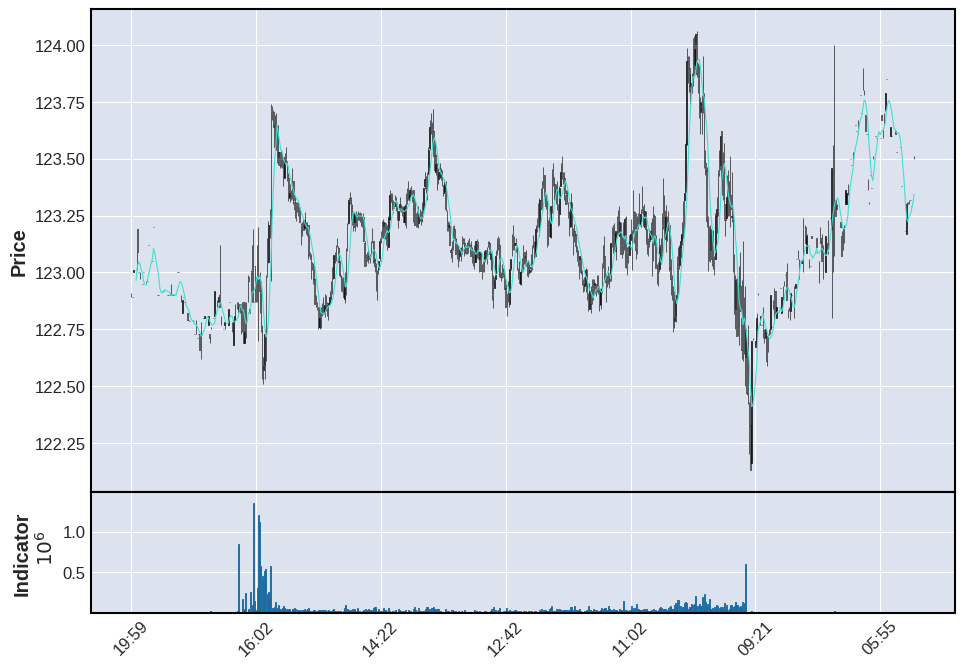

In [17]:
import mplfinance as mpf
import warnings
warnings.filterwarnings("ignore")

strategy.generate_signals('GOOGL')
timeperiod=5
df_plot = strategy.df
df_plot= df_plot.set_index (['timestamp'])
df_plot['Indicator'] = strategy.indicator_data['indicator']
df_plot['Signal'] =signals_df['signal']
df_plot['Signal'] = df_plot['Signal'].replace({'NO_SIGNAL': None})
df_plot.index.name = 'Date'

# Plot the candlestick chart
mpf.plot(df_plot['2023-5-31'],volume=True,type='candle',mav=(timeperiod,),show_nontrading=False,ylabel='Price', ylabel_lower='Indicator',panel_ratios=(4, 1),figscale=1.5);

In [15]:
strategy.generate_signals('NVDA') # signals of NVDA stock price data

,timestamp,signal
index,,
0,2023-06-13 19:59:00,NO_SIGNAL
1,2023-06-13 19:58:00,NO_SIGNAL
2,2023-06-13 19:57:00,NO_SIGNAL
3,2023-06-13 19:56:00,NO_SIGNAL
4,2023-06-13 19:55:00,NO_SIGNAL
...,...,...
8046,2023-05-31 04:04:00,SELL
8047,2023-05-31 04:03:00,SELL
8048,2023-05-31 04:02:00,SELL
